In [60]:
# import packages
import pandas as pd
import numpy as np


# 1. Load Data

In [200]:
df = pd.read_csv(r"C:\Users\Yi\Downloads\continuous dataset.csv\continuous dataset.csv")

In [199]:
df.head()

,datetime,nat_demand,T2M_toc,QV2M_toc,TQL_toc,W2M_toc,T2M_san,QV2M_san,TQL_san,W2M_san,T2M_dav,QV2M_dav,TQL_dav,W2M_dav,Holiday_ID,holiday,school
0,2015-01-03 01:00:00,970.3450,25.865259,0.018576,0.016174,21.850546,23.482446,0.017272,0.001855,10.328949,22.662134,0.016562,0.096100,5.364148,0,0,0
1,2015-01-03 02:00:00,912.1755,25.899255,0.018653,0.016418,22.166944,23.399255,0.017265,0.001327,10.681517,22.578943,0.016509,0.087646,5.572471,0,0,0
2,2015-01-03 03:00:00,900.2688,25.937280,0.018768,0.015480,22.454911,23.343530,0.017211,0.001428,10.874924,22.531030,0.016479,0.078735,5.871184,0,0,0
3,2015-01-03 04:00:00,889.9538,25.957544,0.018890,0.016273,22.110481,23.238794,0.017128,0.002599,10.518620,22.512231,0.016487,0.068390,5.883621,0,0,0
4,2015-01-03 05:00:00,893.6865,25.973840,0.018981,0.017281,21.186089,23.075403,0.017059,0.001729,9.733589,22.481653,0.016456,0.064362,5.611724,0,0,0


In [131]:
df.columns

Index(['datetime', 'nat_demand', 'T2M_toc', 'QV2M_toc', 'TQL_toc', 'W2M_toc',
       'T2M_san', 'QV2M_san', 'TQL_san', 'W2M_san', 'T2M_dav', 'QV2M_dav',
       'TQL_dav', 'W2M_dav', 'Holiday_ID', 'holiday', 'school'],
      dtype='object')

In [132]:
df.shape

(48048, 17)

# 2. EDA

### 2.1 Check Missing Value

In [133]:
# Check Missing Value
df.isna().sum()

datetime      0
nat_demand    0
T2M_toc       0
QV2M_toc      0
TQL_toc       0
W2M_toc       0
T2M_san       0
QV2M_san      0
TQL_san       0
W2M_san       0
T2M_dav       0
QV2M_dav      0
TQL_dav       0
W2M_dav       0
Holiday_ID    0
holiday       0
school        0
dtype: int64

### 2.2 Convert Time series data and check time series completeness

In [134]:
# Convert timestamp
df.datetime = pd.to_datetime(df['datetime'])

In [135]:
df.dtypes

datetime      datetime64[ns]
nat_demand           float64
T2M_toc              float64
QV2M_toc             float64
TQL_toc              float64
W2M_toc              float64
T2M_san              float64
QV2M_san             float64
TQL_san              float64
W2M_san              float64
T2M_dav              float64
QV2M_dav             float64
TQL_dav              float64
W2M_dav              float64
Holiday_ID             int64
holiday                int64
school                 int64
dtype: object

In [136]:
df.datetime.min()

Timestamp('2015-01-03 01:00:00')

In [137]:
df.datetime.max()

Timestamp('2020-06-27 00:00:00')

In [138]:
# Check time stamp completeness and duplicates
expected_hours = pd.date_range(df.datetime.min(), df.datetime.max(), freq = 'h')
missing = set(expected_hours) - set(df.datetime)
len(missing)

0

In [139]:
df.datetime.duplicated().sum()

0

### 2.3 Visualize Variable distributions

In [140]:
## Check variable distributions

In [141]:
import matplotlib.pyplot as plt

<Axes: title={'center': 'nat_demand distribution'}, ylabel='Frequency'>

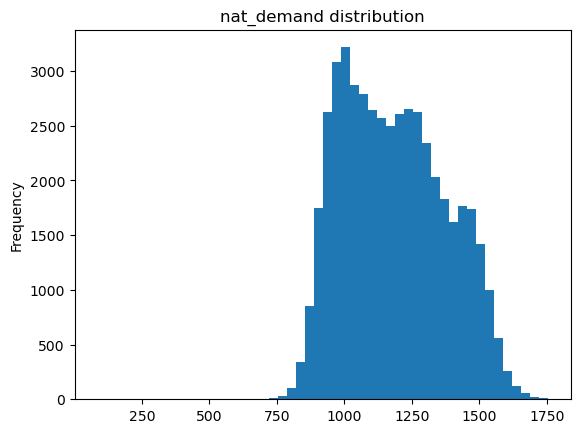

In [142]:
df['nat_demand'].plot(kind = 'hist', bins= 50, title="nat_demand distribution")

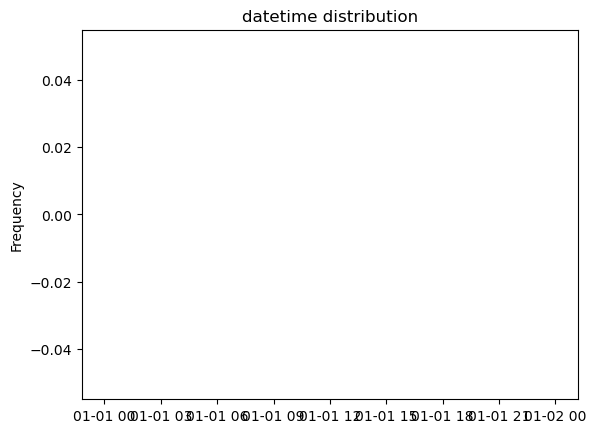

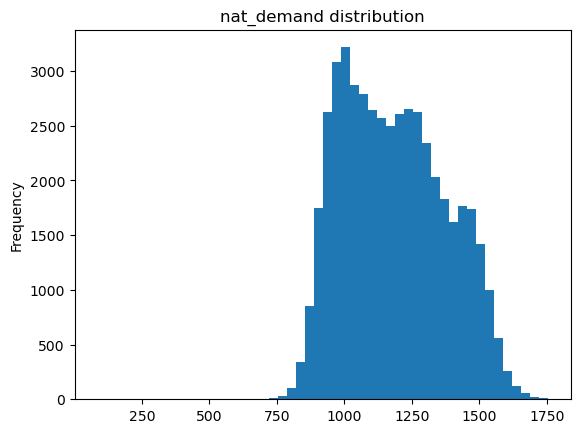

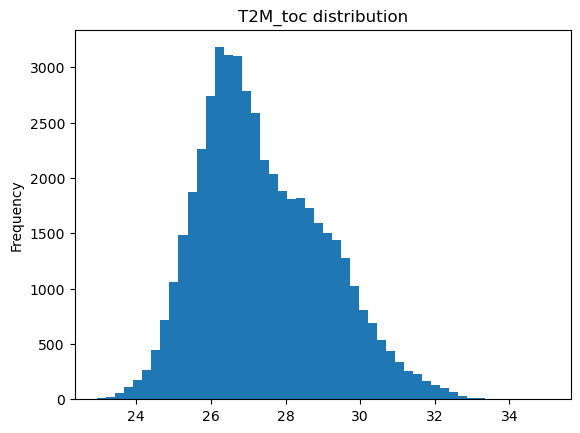

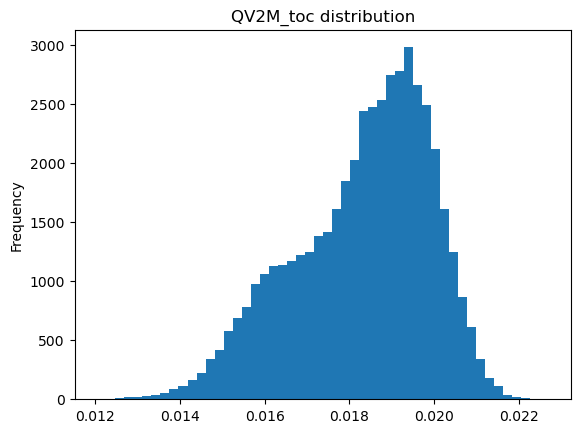

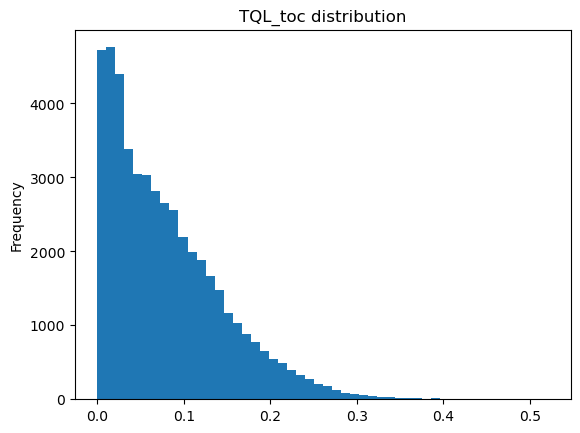

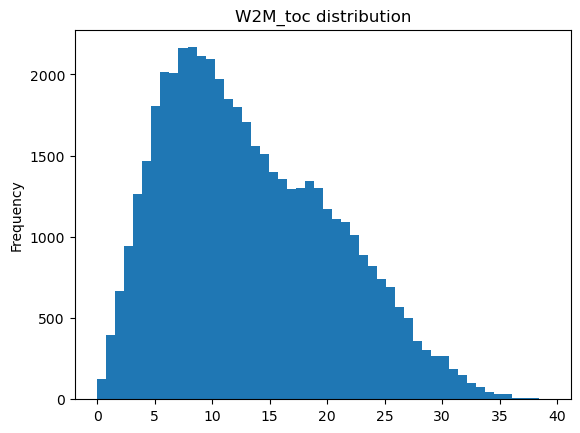

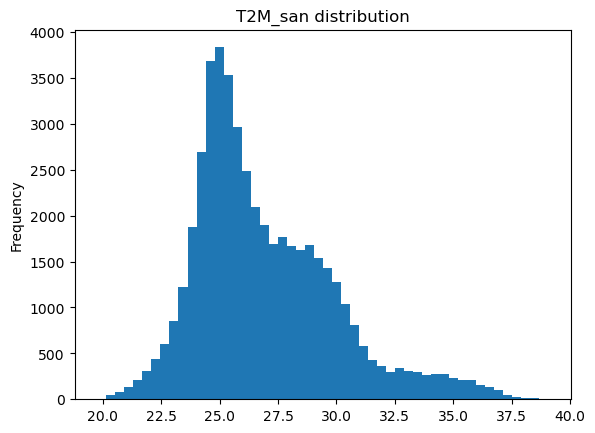

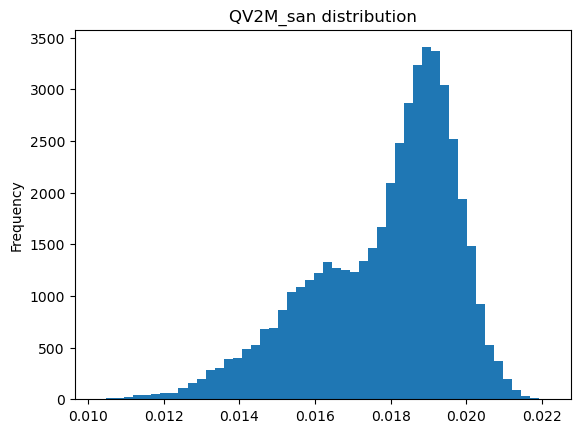

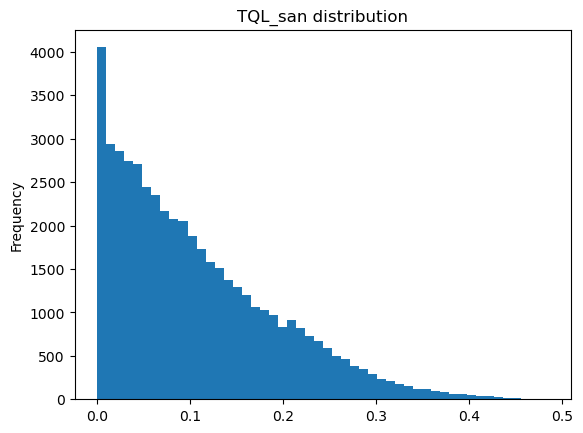

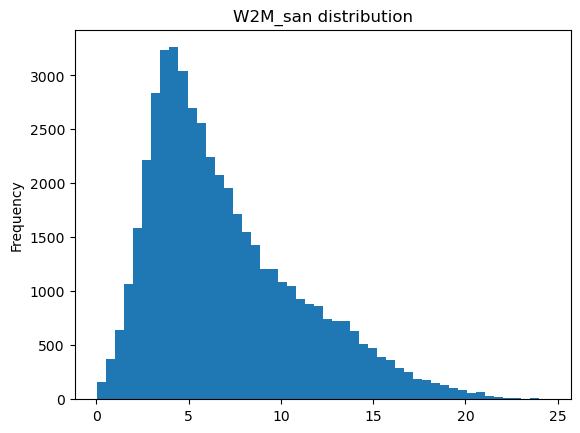

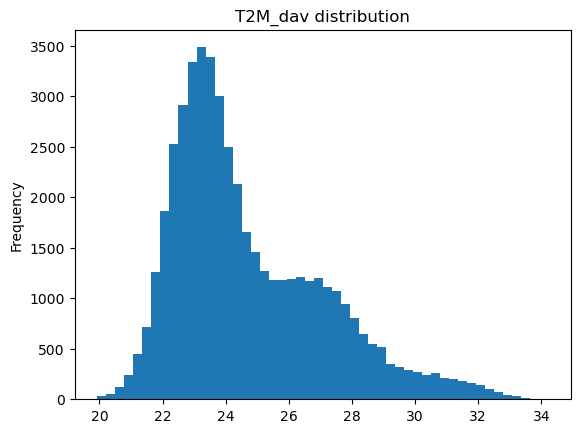

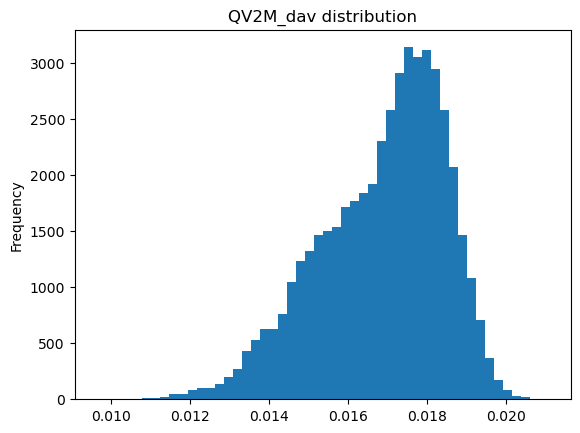

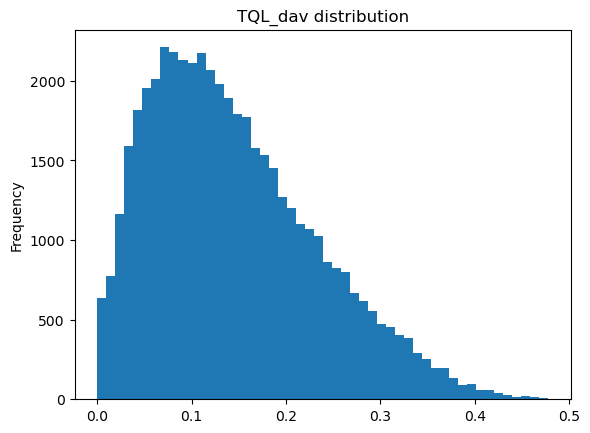

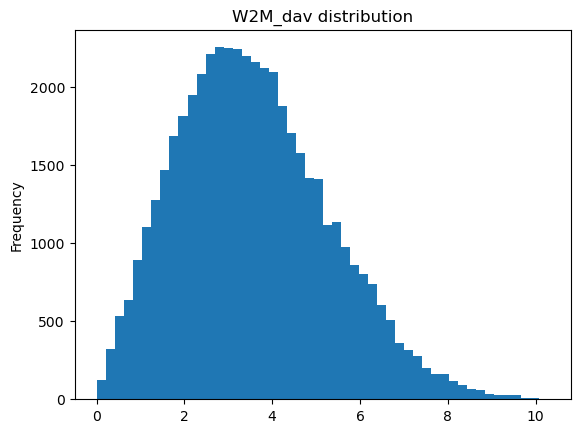

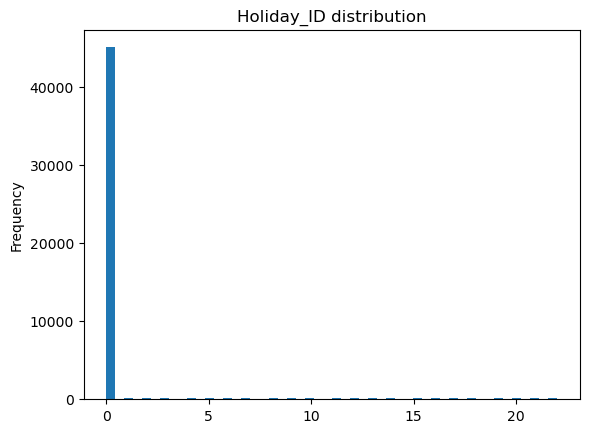

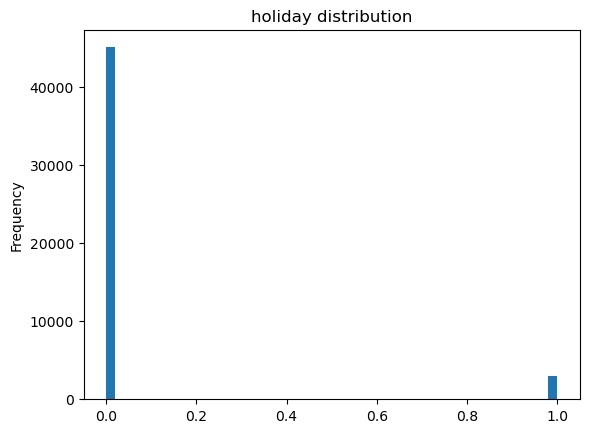

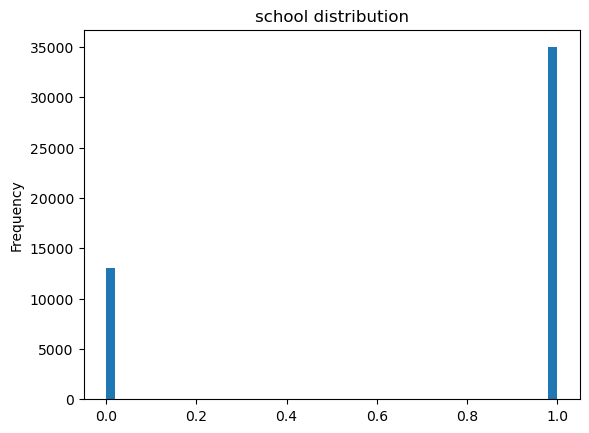

In [143]:
for col in df.columns:
    df[col].plot(kind='hist', bins = 50, title = f'{col} distribution')
    plt.show()

In [144]:
df.Holiday_ID.unique()

array([ 0,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22,  1], dtype=int64)

### 2.4 Visualize Timeseries pattern (seasonality)

In [145]:
#seasonality Test

C:\Users\Yi\AppData\Local\Temp\ipykernel_12128\1640177467.py:1: FutureWarning: last is deprecated and will be removed in a future version. Please create a mask and filter using `.loc` instead
  df.set_index('datetime')['nat_demand'].last('30D').plot(figsize = (12,4), title="30D Demand")


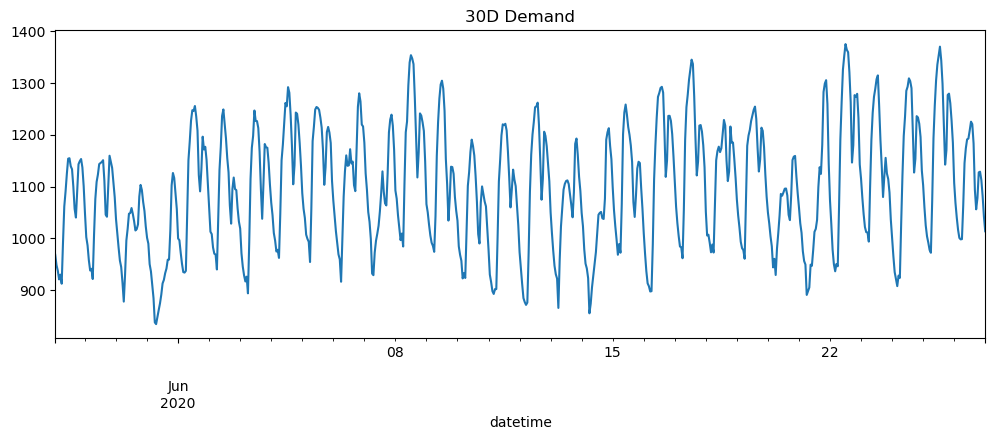

In [146]:
df.set_index('datetime')['nat_demand'].last('30D').plot(figsize = (12,4), title="30D Demand")
plt.show()

<Axes: title={'center': 'Mean hourly load'}, xlabel='hour'>

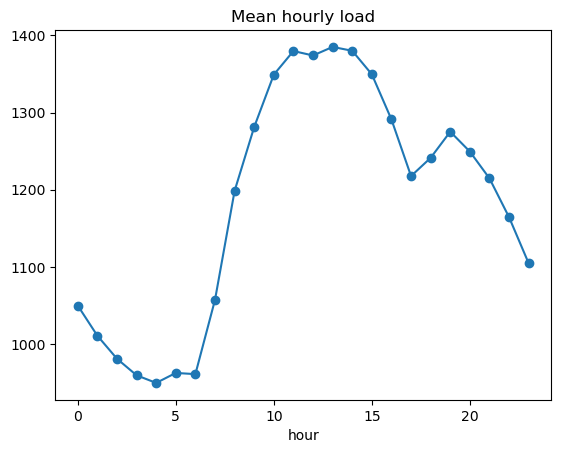

In [147]:
df['hour'] = df['datetime'].dt.hour
df.groupby('hour')['nat_demand'].mean().plot(marker = 'o', title = 'Mean hourly load')

<Axes: title={'center': 'Mean Dayofweek load'}, xlabel='dow'>

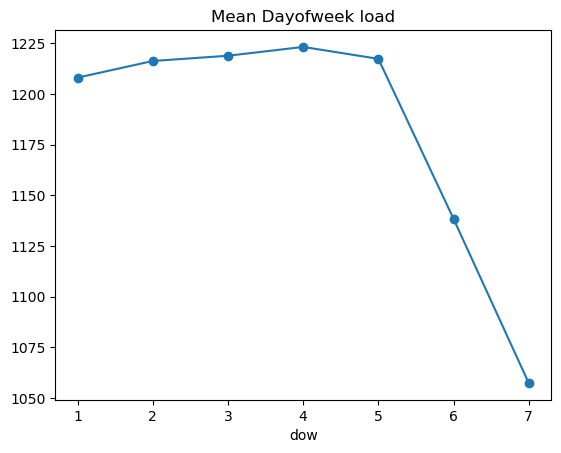

In [148]:
df['dow'] = df['datetime'].dt.dayofweek + 1
df.groupby('dow')['nat_demand'].mean().plot(marker = 'o', title = 'Mean Dayofweek load')

### 2.5 Visualize relationship between features and response

In [149]:
# Relationship between features and target
import seaborn as sns

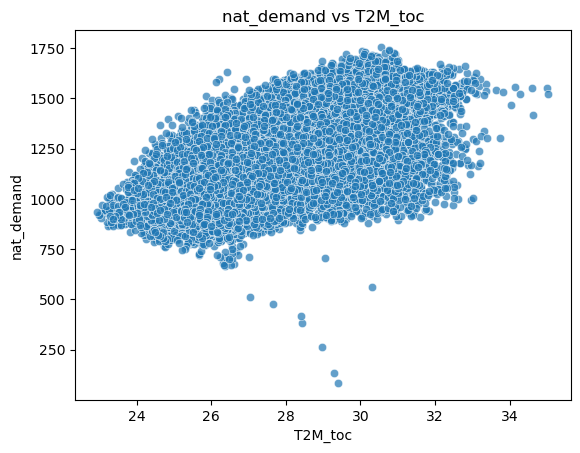

In [150]:
sns.scatterplot(x = df['T2M_toc'], y = df['nat_demand'], alpha = 0.7)
plt.title('nat_demand vs T2M_toc')
plt.show()

C:\Users\Yi\AppData\Local\Temp\ipykernel_12128\1048682141.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('T2M_toc_bin')['nat_demand'].mean().plot(marker = 'o')


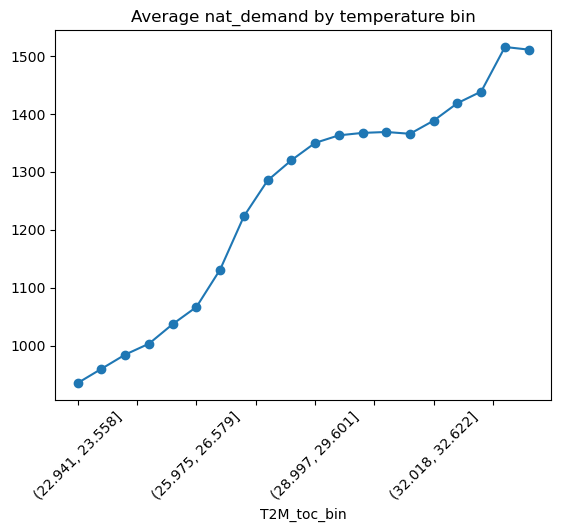

In [151]:
df['T2M_toc_bin'] = pd.cut(df['T2M_toc'], bins = 20)
df.groupby('T2M_toc_bin')['nat_demand'].mean().plot(marker = 'o')
plt.title('Average nat_demand by temperature bin')
plt.xticks(rotation = 45)
plt.show()

In [152]:
corr = df[['T2M_toc', 'nat_demand']].corr(method = 'pearson')
print(f'pearson correlation = {corr}')

pearson correlation =              T2M_toc  nat_demand
T2M_toc     1.000000    0.652811
nat_demand  0.652811    1.000000


In [153]:
# Holiday effect

In [154]:
df.columns

Index(['datetime', 'nat_demand', 'T2M_toc', 'QV2M_toc', 'TQL_toc', 'W2M_toc',
       'T2M_san', 'QV2M_san', 'TQL_san', 'W2M_san', 'T2M_dav', 'QV2M_dav',
       'TQL_dav', 'W2M_dav', 'Holiday_ID', 'holiday', 'school', 'hour', 'dow',
       'T2M_toc_bin'],
      dtype='object')

In [155]:
df.groupby('holiday')['nat_demand'].mean()

holiday
0    1191.115235
1    1060.086115
Name: nat_demand, dtype: float64

In [156]:
df.groupby('school')['nat_demand'].mean()

school
0    1170.292530
1    1187.572329
Name: nat_demand, dtype: float64

# 3. Feature Engineering

In [157]:
df.columns

Index(['datetime', 'nat_demand', 'T2M_toc', 'QV2M_toc', 'TQL_toc', 'W2M_toc',
       'T2M_san', 'QV2M_san', 'TQL_san', 'W2M_san', 'T2M_dav', 'QV2M_dav',
       'TQL_dav', 'W2M_dav', 'Holiday_ID', 'holiday', 'school', 'hour', 'dow',
       'T2M_toc_bin'],
      dtype='object')

In [158]:
# Time series feature engineering

df.datetime = pd.to_datetime(df.datetime)
df = df.set_index('datetime')


In [159]:
df['hour'] = df.index.hour
df['dow'] = df.index.dayofweek
df['month'] = df.index.month
df['dayofyear'] = df.index.dayofyear
df['is_weekend'] = (df['dow']>=5).astype(int)

#cyclical encoding
df['hour_sin'] = np.sin(2*np.pi*df['hour']/24)
df['hour_cos'] = np.cos(2*np.pi*df['hour']/24)


In [160]:
# lag features for demand

for lag in [1,2,3,6,12,24,168]:
    df[f'demand_lag_{lag}'] = df['nat_demand'].shift(lag)

for rolling in [3,6,24, 168]:
    df[f'demand_lag_rolling_{rolling}'] = df['nat_demand'].shift(1).rolling(rolling).mean()

    

In [161]:
df = df.dropna()

In [162]:
df.columns

Index(['nat_demand', 'T2M_toc', 'QV2M_toc', 'TQL_toc', 'W2M_toc', 'T2M_san',
       'QV2M_san', 'TQL_san', 'W2M_san', 'T2M_dav', 'QV2M_dav', 'TQL_dav',
       'W2M_dav', 'Holiday_ID', 'holiday', 'school', 'hour', 'dow',
       'T2M_toc_bin', 'month', 'dayofyear', 'is_weekend', 'hour_sin',
       'hour_cos', 'demand_lag_1', 'demand_lag_2', 'demand_lag_3',
       'demand_lag_6', 'demand_lag_12', 'demand_lag_24', 'demand_lag_168',
       'demand_lag_rolling_3', 'demand_lag_rolling_6', 'demand_lag_rolling_24',
       'demand_lag_rolling_168'],
      dtype='object')

In [163]:
len(df)

47880

# 4. Random Forest Regression

In [164]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [165]:
df_processed = df.copy()
features_col = ['T2M_toc', 'QV2M_toc', 'TQL_toc', 'W2M_toc', 'T2M_san',
       'QV2M_san', 'TQL_san', 'W2M_san', 'T2M_dav', 'QV2M_dav', 'TQL_dav',
       'W2M_dav', 'Holiday_ID', 'holiday', 'school', 'hour', 'dow', 'month', 'dayofyear', 'is_weekend', 'hour_sin',
       'hour_cos', 'demand_lag_1', 'demand_lag_2', 'demand_lag_3',
       'demand_lag_6', 'demand_lag_12', 'demand_lag_24', 'demand_lag_168',
       'demand_lag_rolling_3', 'demand_lag_rolling_6', 'demand_lag_rolling_24',
       'demand_lag_rolling_168']
response_col = ['nat_demand']
X = df_processed[features_col].copy()
y = df_processed[response_col].copy()

### 4.1 Train Test Split

In [166]:
# Train Test Split
train_percent = 0.7
cv_percent = 0.15
test_percent = 0.15

train_end = int(len(X)*train_percent)
cv_end = int(len(X)*(cv_percent+train_percent))

X_train, y_train = X.iloc[:train_end], y.iloc[:train_end]
X_val, y_val = X.iloc[train_end:cv_end], y.iloc[train_end:cv_end]
X_test, y_test = X.iloc[cv_end:], y.iloc[cv_end:]

print(f'Length of Training set = {len(X_train)}')
print(f'Length of Validation set = {len(X_val)}')
print(f'Length of Testing set = {len(X_test)}')

Length of Training set = 33516
Length of Validation set = 7182
Length of Testing set = 7182


### 4.2 Model Training with fixed Parameters

In [167]:
rf = RandomForestRegressor(
    n_estimators=400,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    n_jobs=-1,
    random_state=42
)
rf.fit(X_train, y_train)

C:\Users\Yi\anaconda3\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(n_estimators=400, n_jobs=-1, random_state=42)

In [168]:
y_val_predict = rf.predict(X_val)

In [169]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mean_squared_error(y_val, y_val_predict, multioutput='uniform_average')

1023.2025206044771

In [170]:
mean_absolute_error(y_val, y_val_predict, multioutput='uniform_average')

17.18815169587062

### 4.3 Grid Search CV with fixed validation set

In [171]:
from sklearn.model_selection import GridSearchCV, PredefinedSplit
from sklearn.metrics import mean_squared_error, mean_absolute_error, make_scorer

In [172]:
# Predefined Split
test_fold = np.r_[
    np.full(train_end, -1),           # train
    np.zeros(cv_end -train_end),  # validation
]
ps = PredefinedSplit(test_fold=test_fold)

def overall_rmse(y_true, y_pred):
    return mean_squared_error(y_true.ravel(), y_pred.ravel(), squared=False)

rmse_scorer = make_scorer(overall_rmse, greater_is_better=False) 


param_grid = {
    "n_estimators": [200, 400],
    "max_depth": [None, 12, 20],
    "min_samples_leaf": [1, 3, 5],
    "max_features": ["sqrt", 0.5, None],
}

rf = RandomForestRegressor(
    n_jobs=-1,
    random_state=42,
)

gcv = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    scoring=rmse_scorer,
    cv=ps,
    refit=True,        
)

gcv.fit(np.vstack([X_train, X_val]), np.vstack([y_train, y_val]))
print("Best params:", gcv.best_params_)
print("Best validation RMSE (negated):", -gcv.best_score_)

C:\Users\Yi\anaconda3\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Yi\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Yi\anaconda3\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Yi\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the fu

Best params: {'max_depth': 20, 'max_features': 0.5, 'min_samples_leaf': 3, 'n_estimators': 200}
Best validation RMSE (negated): 29.457136595832193


In [173]:
# Retrain the model
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(
    n_estimators=200,
    max_depth=20,
    max_features = 0.5,
    min_samples_leaf=3,
    n_jobs=-1,
    random_state=42
)
rf.fit(X_train, y_train)

y_val_pred= rf.predict(X_val)



mean_squared_error(y_val, y_val_pred, squared=False)

C:\Users\Yi\anaconda3\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Yi\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


29.457136595832196

In [174]:
# Test set Performance
y_pred = rf.predict(X_test)

def overall_metrics(y_true, y_pred):
    return {
        "RMSE_overall": mean_squared_error(y_true, y_pred, squared=False),
        "MAE_overall": mean_absolute_error(y_true, y_pred),
        "R2_overall": r2_score(y_true, y_pred, multioutput="uniform_average")
    }

ov = overall_metrics(y_test, y_pred)

print(ov)

{'RMSE_overall': 30.281275238377326, 'MAE_overall': 21.431792675325628, 'R2_overall': 0.9730980807881582}


C:\Users\Yi\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


### 4.4 Prediction Result Visualization

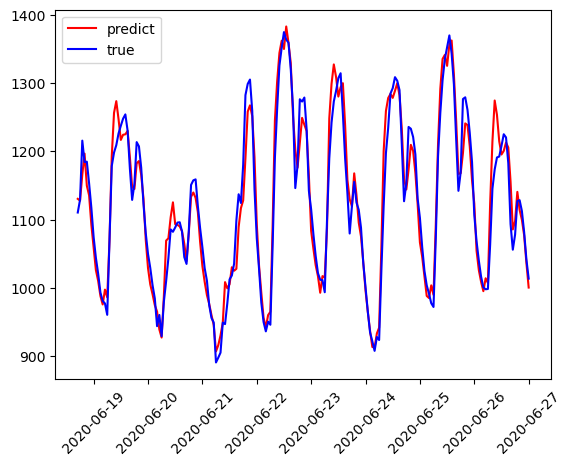

In [175]:
# Visulize the result
import matplotlib.pyplot as plt
y_predict = rf.predict(X)

plt.plot(X.index[-200:], y_predict[-200:], color = 'red',label = 'predict')
plt.plot(X.index[-200:], y[-200:], color = 'blue',label = 'true')
plt.xticks(rotation = 45)
plt.legend()
plt.show()


### 5. Time Series Walk Forward Validation and Learning Curves

In [176]:
from sklearn.model_selection import TimeSeriesSplit

In [177]:
n = len(X)
train_end = int(0.7*n)
val_end = int(0.85*n)

X_wft = X[:val_end]
y_wft = y[:val_end]
X_test = X[val_end:]
y_test = y[val_end:]

tscv = TimeSeriesSplit(n_splits=4, test_size=int(0.15*n), gap=72)


In [178]:
# fix parameter TimeSeriesSplit Validation
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(
    n_estimators=200,
    max_depth=20,
    max_features = 0.5,
    min_samples_leaf=3,
    n_jobs=-1,
    random_state=42
)

for train_idx, test_idx in tscv.split(X_wft):
    X_train, X_val = X_wft.iloc[train_idx], X_wft.iloc[test_idx]
    y_train, y_val = y_wft.iloc[train_idx], y_wft.iloc[test_idx]

    model.fit(X_train, y_train.values.ravel())
    preds = model.predict(X_val)
    score = mean_squared_error(y_val, preds)
    print(score)

398.362189227454
703.8548228126027
284.4223963014618
877.3252111623287


In [179]:
# cross validation parameters tuning

from sklearn.model_selection import GridSearchCV, TimeSeriesSplit
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=42, n_jobs=-1)


param_grid = {
    "n_estimators": [100, 200],
    "max_depth": [10, 20, None],
    "min_samples_leaf": [1, 3, 5],
    "max_features": [0.5, "sqrt"]
}

tscv = TimeSeriesSplit(n_splits=5, test_size=1500, gap=72)


grid = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=tscv,
    scoring="neg_root_mean_squared_error",
    n_jobs=-1
)

grid.fit(X_wft, y_wft.values.ravel())

print("Best params:", grid.best_params_)
print("Best CV score (RMSE):", -grid.best_score_)

Best params: {'max_depth': 20, 'max_features': 0.5, 'min_samples_leaf': 1, 'n_estimators': 200}
Best CV score (RMSE): 26.074936306185748


In [180]:
from sklearn.model_selection import learning_curve, TimeSeriesSplit

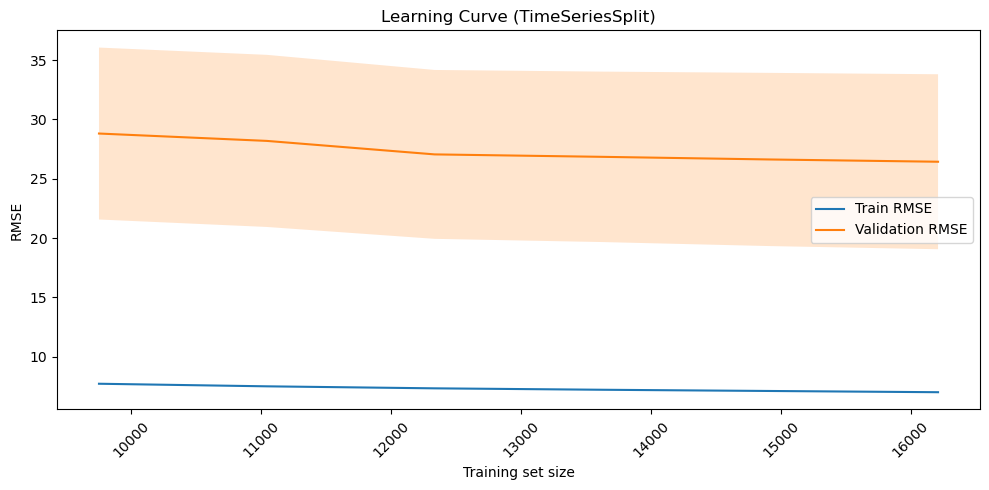

In [181]:

best_model = grid.best_estimator_
n_samples = len(X_wft)
n_splits  = 4
test_size = int(0.15*n_samples)
gap       = 72
tscv_lc   = TimeSeriesSplit(n_splits=n_splits, test_size=test_size, gap=gap)


min_needed = n_splits * test_size + gap + 1
min_frac = min(0.9, max(0.2, min_needed / n_samples))

train_sizes_frac = np.linspace(min_frac, 1.0, 6)


train_sizes, train_scores, val_scores = learning_curve(
    estimator=best_model,
    X=X_wft,
    y=y_wft,
    cv=tscv_lc,
    scoring="neg_root_mean_squared_error",
    train_sizes=train_sizes_frac,
    shuffle=False,
    n_jobs=-1
)


train_rmse_mean = -train_scores.mean(axis=1)
train_rmse_std  =  train_scores.std(axis=1)
val_rmse_mean   = -val_scores.mean(axis=1)
val_rmse_std    =  val_scores.std(axis=1)


fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(train_sizes, train_rmse_mean, label="Train RMSE")
ax.fill_between(train_sizes, train_rmse_mean-train_rmse_std, train_rmse_mean+train_rmse_std, alpha=0.2)

ax.plot(train_sizes, val_rmse_mean, label="Validation RMSE")
ax.fill_between(train_sizes, val_rmse_mean-val_rmse_std, val_rmse_mean+val_rmse_std, alpha=0.2)

ax.set_title("Learning Curve (TimeSeriesSplit)")
ax.set_xlabel("Training set size")
ax.set_ylabel("RMSE")
ax.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 5 LSTM

### 5.1 LSTM feature engineering (Standardization)

Shapes: X_tr (33325, 168, 28) Y_tr (33325, 24) X_va (6919, 168, 28) Y_va (6919, 24) X_te (6919, 168, 28) Y_te (6919, 24)


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)           │ (None, 168, 28)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_6 (LSTM)                        │ (None, 168, 128)            │          80,384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 168, 128)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_7 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 24)                  │           1,560 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 131,352 (513.09 KB)

 Trainable params: 131,352 (513.09 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
131/131 ━━━━━━━━━━━━━━━━━━━━ 98s 735ms/step - loss: 163.5504 - mae: 164.0498 - val_loss: 165.2449 - val_mae: 165.7444 - learning_rate: 3.0000e-04
Epoch 2/100
131/131 ━━━━━━━━━━━━━━━━━━━━ 88s 670ms/step - loss: 162.2771 - mae: 162.7765 - val_loss: 164.9178 - val_mae: 165.4173 - learning_rate: 3.0000e-04
Epoch 3/100
131/131 ━━━━━━━━━━━━━━━━━━━━ 88s 669ms/step - loss: 161.2844 - mae: 161.7839 - val_loss: 164.5992 - val_mae: 165.0986 - learning_rate: 3.0000e-04
Epoch 4/100
131/131 ━━━━━━━━━━━━━━━━━━━━ 88s 673ms/step - loss: 160.2249 - mae: 160.7245 - val_loss: 164.4218 - val_mae: 164.9212 - learning_rate: 3.0000e-04
Epoch 5/100
131/131 ━━━━━━━━━━━━━━━━━━━━ 88s 673ms/step - loss: 159.3566 - mae: 159.8561 - val_loss: 164.1282 - val_mae: 164.6277 - learning_rate: 3.0000e-04
Epoch 6/100
131/131 ━━━━━━━━━━━━━━━━━━━━ 87s 667ms/step - loss: 158.4664 - mae: 158.9658 - val_loss: 164.0594 - val_mae: 164.5589 - learning_rate: 3.0000e-04
Epoch 7/100
131/131 ━━━━━━━━━━━━━━━━━━━━ 86s 657ms/s

C:\Users\Yi\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Yi\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


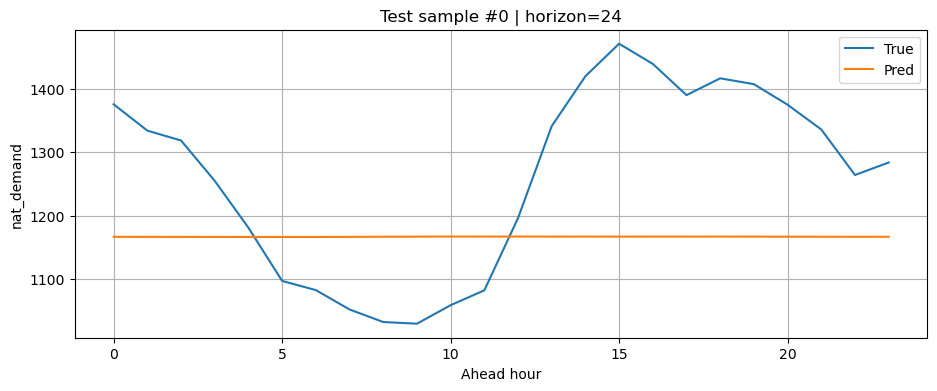

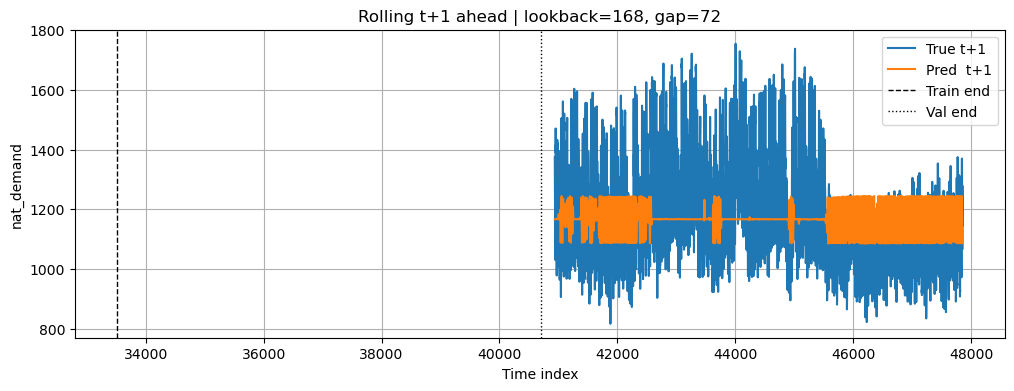

In [184]:
# pip install tensorflow scikit-learn matplotlib pandas numpy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import tensorflow as tf
from tensorflow.keras import layers, models

# ===================== 0) 参数配置 =====================
target_col   = 'nat_demand'   # 目标列
horizon      = 24             # 未来预测步数
lookback     = 168            # 过去窗口长度（7天）
gap_hours    = 72             # train/val/test 之间间隔，防泄漏
train_ratio  = 0.7
val_ratio    = 0.15
batch_size   = 256
epochs       = 100
lr           = 3e-4           # y不标准化时略小更稳
seed         = 42
np.random.seed(seed); tf.random.set_seed(seed)

# ===================== 1) 准备数据 df =====================
# 你的 features 清单（存在的会自动取交集）
all_feats_from_you = [
    'T2M_toc','QV2M_toc','TQL_toc','W2M_toc',
    'T2M_san','QV2M_san','TQL_san','W2M_san',
    'T2M_dav','QV2M_dav','TQL_dav','W2M_dav',
    'Holiday_ID','holiday','school',
    'hour','dow','month','dayofyear','is_weekend',
    'hour_sin','hour_cos',
    'demand_lag_1','demand_lag_2','demand_lag_3','demand_lag_6',
    'demand_lag_12','demand_lag_24','demand_lag_168',
    'demand_lag_rolling_3','demand_lag_rolling_6',
    'demand_lag_rolling_24','demand_lag_rolling_168'
]

# 假设你已有 df_processed
df = df_processed[[c for c in all_feats_from_you if c in df_processed.columns] + [target_col]].copy()

# ——— 强特征建议至少包含：lag_24 / lag_168 + hour_sin/cos
weather_cols = [c for c in [
    'T2M_toc','QV2M_toc','TQL_toc','W2M_toc',
    'T2M_san','QV2M_san','TQL_san','W2M_san',
    'T2M_dav','QV2M_dav','TQL_dav','W2M_dav'
] if c in df.columns]

lag_cols = [c for c in [
    'demand_lag_1','demand_lag_2','demand_lag_3','demand_lag_6',
    'demand_lag_12','demand_lag_24','demand_lag_168',
    'demand_lag_rolling_3','demand_lag_rolling_6',
    'demand_lag_rolling_24','demand_lag_rolling_168'
] if c in df.columns]

passthrough_cols = [c for c in ['hour_sin','hour_cos','holiday','school','is_weekend'] if c in df.columns]

# 最终特征（可先从强特征起步，再逐步加天气与更多lag）
# feature_cols = ['demand_lag_24','demand_lag_168','hour_sin','hour_cos']  # 最小强基线
feature_cols = list(dict.fromkeys(  # 去重保持顺序
    ['demand_lag_24','demand_lag_168','hour_sin','hour_cos'] + lag_cols + weather_cols + passthrough_cols
))

assert target_col in df.columns, f"df 中找不到目标列 {target_col}"
assert len(feature_cols) > 0, "没有可用特征列"

# —— 去掉前期因 lag/rolling 产生的 NaN（防止进入窗口）
df = df.dropna(subset=feature_cols + [target_col]).copy()

# ===================== 2) 时间切分 + gap =====================
N = len(df)
tr_end = int(N * train_ratio)
va_end = int(N * (train_ratio + val_ratio))

tr_slice = slice(0, tr_end)
va_slice = slice(tr_end + gap_hours, va_end)
te_slice = slice(va_end + gap_hours, N)

# 防空切分检查
assert len(df.iloc[tr_slice]) > lookback + horizon, "训练集太短，需更多数据或缩短lookback/horizon"
assert len(df.iloc[va_slice]) > lookback + horizon, "验证集太短，调整gap或比例"
assert len(df.iloc[te_slice]) > lookback + horizon, "测试集太短，调整gap或比例"

# ===================== 3) X 标准化（y 不标准化） =====================
continuous_cols = [c for c in (weather_cols + lag_cols) if c in feature_cols]

X_all = df[feature_cols].copy()
y_all = df[target_col].astype('float32').values  # 直接用原始量纲

# 仅用训练段拟合 X 的 scaler，避免泄漏
idx_tr = X_all.index[:tr_end]
scaler_X = StandardScaler()
if continuous_cols:
    X_all.loc[idx_tr, continuous_cols] = scaler_X.fit_transform(X_all.loc[idx_tr, continuous_cols])
    X_all.loc[:, continuous_cols]      = scaler_X.transform(X_all.loc[:, continuous_cols])

# ===================== 4) 窗口化（多输出） =====================
def make_windows(X_df, y_arr, lookback, horizon, start, end):
    """
    X: (N, lookback, F)
    Y: (N, horizon)
    """
    X_mat = X_df.values.astype('float32')
    X_list, Y_list = [], []
    for t in range(start + lookback, end - horizon + 1):
        X_list.append(X_mat[t-lookback:t, :])
        Y_list.append(y_arr[t:t+horizon])
    if not X_list:
        return None, None
    return np.stack(X_list), np.stack(Y_list)

X_tr, Y_tr = make_windows(X_all.iloc[tr_slice], y_all[tr_slice], lookback, horizon, 0, tr_slice.stop - tr_slice.start)
X_va, Y_va = make_windows(X_all.iloc[va_slice], y_all[va_slice], lookback, horizon, 0, va_slice.stop - va_slice.start)
X_te, Y_te = make_windows(X_all.iloc[te_slice], y_all[te_slice], lookback, horizon, 0, te_slice.stop - te_slice.start)

print("Shapes:",
      "X_tr", None if X_tr is None else X_tr.shape,
      "Y_tr", None if Y_tr is None else Y_tr.shape,
      "X_va", None if X_va is None else X_va.shape,
      "Y_va", None if Y_va is None else Y_va.shape,
      "X_te", None if X_te is None else X_te.shape,
      "Y_te", None if Y_te is None else Y_te.shape)

# ===================== 5) LSTM 模型（Direct Multi-Output） =====================
F = X_tr.shape[-1]

# 偏置初始化到训练集均值（让初始预测更接近真实量级）
y_train_mean = float(df.iloc[:tr_end][target_col].mean())
bias_init = tf.keras.initializers.Constant(y_train_mean)

inputs = layers.Input(shape=(lookback, F))
x = layers.LSTM(128, return_sequences=True)(inputs)
x = layers.Dropout(0.2)(x)
x = layers.LSTM(64)(x)
x = layers.Dropout(0.2)(x)
outputs = layers.Dense(horizon, bias_initializer=bias_init)(x)  # 一次性输出 horizon 个点

model = models.Model(inputs, outputs)
model.compile(optimizer=tf.keras.optimizers.Adam(lr),
              loss=tf.keras.losses.Huber(delta=1.0),   # 或 'mae'；不想换也可改回 'mse'
              metrics=['mae'])
model.summary()

es    = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=8, restore_best_weights=True)
rlrop = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=4, min_lr=1e-5)

hist = model.fit(X_tr, Y_tr,
                 validation_data=(X_va, Y_va),
                 epochs=epochs, batch_size=batch_size,
                 callbacks=[es, rlrop], verbose=1)

# ===================== 6) 评估（原始量纲） =====================
Y_hat_te = model.predict(X_te, verbose=0)  # (n_samples, horizon)

def smape(y_true, y_pred):
    denom = (np.abs(y_true) + np.abs(y_pred)) / 2.0
    return np.mean( np.where(denom==0, 0.0, np.abs(y_true - y_pred) / denom) ) * 100

rmse = mean_squared_error(Y_te.ravel(), Y_hat_te.ravel(), squared=False)
mae  = mean_absolute_error(Y_te.ravel(), Y_hat_te.ravel())
smape_val = smape(Y_te.ravel(), Y_hat_te.ravel())
print(f"[TEST] RMSE={rmse:.3f} | MAE={mae:.3f} | sMAPE={smape_val:.2f}%")

# —— 朴素基线（快速 sanity）：t+1 ≈ 当前窗口对应的“昨天同小时”近似
# 这里简化用每个窗口的第1步真值复制（仅用于 sanity，不作正式评估）
naive_pred = np.tile(Y_te[:, :1], (1, Y_te.shape[1]))
rmse_naive = mean_squared_error(Y_te.ravel(), naive_pred.ravel(), squared=False)
mae_naive  = mean_absolute_error(Y_te.ravel(), naive_pred.ravel())
print(f"[Naive] RMSE={rmse_naive:.3f} | MAE={mae_naive:.3f}")

# ===================== 7) 可视化 =====================
# 7.1 展示测试集第 k 个样本的 24h 轨迹
k = 0
true_series = Y_te[k]
pred_series = Y_hat_te[k]

plt.figure(figsize=(11,4))
plt.plot(range(horizon), true_series, label='True')
plt.plot(range(horizon), pred_series, label='Pred')
plt.title(f'Test sample #{k} | horizon={horizon}')
plt.xlabel('Ahead hour'); plt.ylabel(target_col)
plt.legend(); plt.grid(True); plt.show()

# 7.2 固定第 h 步（如 t+1 或 t+24）滚动拼接
h_show = 0  # 0 表示 t+1；23 表示 t+24
start_idx = (va_slice.stop) + gap_hours + lookback
pred_line = Y_hat_te[:, h_show]
true_line = Y_te[:, h_show]

plt.figure(figsize=(12,4))
plt.plot(range(start_idx, start_idx+len(true_line)), true_line, label=f'True t+{h_show+1}')
plt.plot(range(start_idx, start_idx+len(pred_line)), pred_line, label=f'Pred  t+{h_show+1}')
plt.axvline(tr_end, color='k', linestyle='--', linewidth=1, label='Train end')
plt.axvline(va_end, color='k', linestyle=':',  linewidth=1, label='Val end')
plt.title(f'Rolling t+{h_show+1} ahead | lookback={lookback}, gap={gap_hours}')
plt.xlabel('Time index'); plt.ylabel(target_col); plt.legend(); plt.grid(True); plt.show()


# 6. LSTM with pytorch


In [185]:
df_processed.columns

Index(['nat_demand', 'T2M_toc', 'QV2M_toc', 'TQL_toc', 'W2M_toc', 'T2M_san',
       'QV2M_san', 'TQL_san', 'W2M_san', 'T2M_dav', 'QV2M_dav', 'TQL_dav',
       'W2M_dav', 'Holiday_ID', 'holiday', 'school', 'hour', 'dow',
       'T2M_toc_bin', 'month', 'dayofyear', 'is_weekend', 'hour_sin',
       'hour_cos', 'demand_lag_1', 'demand_lag_2', 'demand_lag_3',
       'demand_lag_6', 'demand_lag_12', 'demand_lag_24', 'demand_lag_168',
       'demand_lag_rolling_3', 'demand_lag_rolling_6', 'demand_lag_rolling_24',
       'demand_lag_rolling_168'],
      dtype='object')

In [186]:
features = [
    'T2M_toc','QV2M_toc','TQL_toc','W2M_toc',
    'T2M_san','QV2M_san','TQL_san','W2M_san',
    'T2M_dav','QV2M_dav','TQL_dav','W2M_dav',
    'Holiday_ID','holiday','school'
]
target = 'nat_demand'

from sklearn.preprocessing import MinMaxScaler
# Scale features and target
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()
X = scaler_x.fit_transform(df_processed[features])
y = scaler_y.fit_transform(df_processed[[target]])

In [187]:
from sklearn.model_selection import train_test_split
# Create sequences for time series
def create_sequences(X, y, seq_length):
    xs, ys = [], []
    for i in range(len(X) - seq_length):
        xs.append(X[i:(i+seq_length)])
        ys.append(y[i+seq_length])
    return np.array(xs), np.array(ys)

SEQ_LENGTH = 24       # For 24 Hours
X_seq, y_seq = create_sequences(X, y, SEQ_LENGTH)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_seq, y_seq, test_size=0.2, shuffle=False)

In [188]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
class TimeSeriesDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.float32)
    def __len__(self):
        return len(self.X)
    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

BATCH_SIZE = 64

train_dataset = TimeSeriesDataset(X_train, y_train)
test_dataset = TimeSeriesDataset(X_test, y_test)
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)

In [190]:
device = torch.device('cpu')
#for lstm
import torch.nn as nn

class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size, dropout=0.0):
        super(LSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True, dropout=dropout)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        out, _ = self.lstm(x)        # LSTM returns (output, (h_n, c_n))
        out = out[:, -1, :]          # Use output from last time step
        out = self.fc(out)           # Fully connected output
        return out
        
INPUT_SIZE = len(features)
HIDDEN_SIZE = 256
NUM_LAYERS = 4
OUTPUT_SIZE = 1
DROPOUT = 0.4

lstm_model = LSTMModel(INPUT_SIZE, HIDDEN_SIZE, NUM_LAYERS, OUTPUT_SIZE, dropout=DROPOUT)
lstm_model = lstm_model.to(device)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(lstm_model.parameters(), lr=0.001)
EPOCHS = 50

for epoch in range(EPOCHS):
    lstm_model.train()
    train_loss = 0
    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        optimizer.zero_grad()
        output = lstm_model(X_batch)
        loss = criterion(output, y_batch)
        loss.backward()
        optimizer.step()
        train_loss += loss.item() * X_batch.size(0)
    train_loss /= len(train_loader.dataset)
    
    if (epoch + 1) % 10 == 0:
        print(f"Epoch {epoch+1}/{EPOCHS}, Loss: {train_loss:.4f}")

Epoch 10/50, Loss: 0.0037
Epoch 20/50, Loss: 0.0031
Epoch 30/50, Loss: 0.0020
Epoch 40/50, Loss: 0.0011
Epoch 50/50, Loss: 0.0006


In [191]:
lstm_model.eval()
predictions_lstm, actuals = [], []
with torch.no_grad():
    for X_batch, y_batch in test_loader:
        X_batch = X_batch.to(device)
        output = lstm_model(X_batch)
        predictions_lstm.append(output.cpu().numpy())
        actuals.append(y_batch.numpy())

# Concatenate and inverse scale
predictions_lstm = np.concatenate(predictions_lstm)
actuals = np.concatenate(actuals)
predictions_lstm = scaler_y.inverse_transform(predictions_lstm)
actuals = scaler_y.inverse_transform(actuals)

# Metrics
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
mse = mean_squared_error(actuals, predictions_lstm)
mape = mean_absolute_percentage_error(actuals, predictions_lstm)
accuracy = 100 * (1 - mape)

print(f"LSTM Test MSE: {mse:.2f}")
print(f"LSTM Model Accuracy (t+1): {accuracy:.2f}%")

LSTM Test MSE: 24117.29
LSTM Model Accuracy (t+1): 90.32%


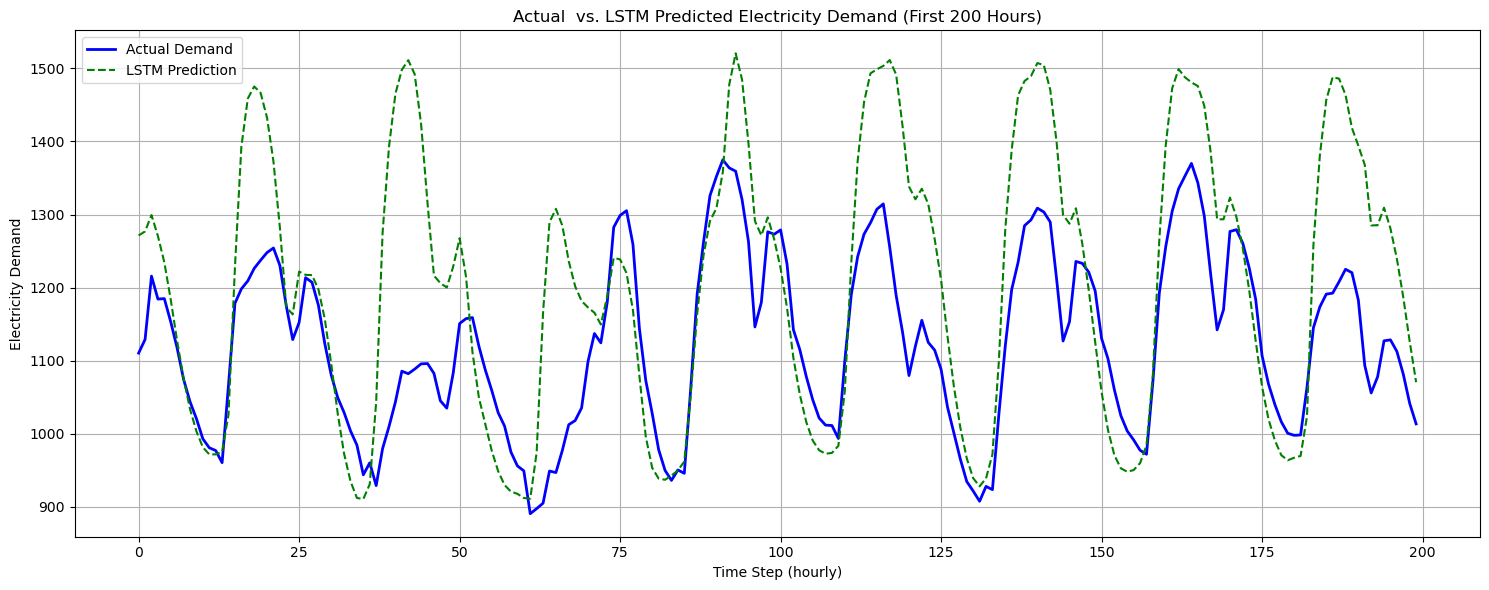

In [196]:
import matplotlib.pyplot as plt

# Plot first 200 test samples
plt.figure(figsize=(15, 6))
plt.plot(actuals[-200:], label='Actual Demand', color='blue', linewidth=2)

plt.plot(predictions_lstm[-200:], label='LSTM Prediction', color='green', linestyle='--')
plt.title('Actual  vs. LSTM Predicted Electricity Demand (First 200 Hours)')
plt.xlabel('Time Step (hourly)')
plt.ylabel('Electricity Demand')
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()